In [1]:
# Heart Disease prediction using multiple patient record data - Aarond D.
# MVP Concept using multiple data sources that should contain information 
# that are well-known factors for coronary heart disease. E.g. Cholesterol, chest pains, glucose levels, smoking, bmi etc.
# Limited to 2007-2008 in this exploration. Can add data from other years if found feasible.
# Root source: https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2007

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# get dataset for patients who answered if they have had heart disease
df_hd = pd.read_csv('has_heart_disease.csv', index_col=0)

In [4]:
df_hd

,SEQN,HasHeartDisease
0,41475.0,0
2,41477.0,0
4,41479.0,0
6,41481.0,0
7,41482.0,0
...,...,...
9660,51618.0,0
9661,51619.0,0
9662,51620.0,0
9664,51622.0,0


In [5]:
df_hd[df_hd.HasHeartDisease == 1].count()

SEQN               253
HasHeartDisease    253
dtype: int64

253 patients from the 5906 asked in the questionaire, had been told by a doctor they had heart disease (2007-2008)

#### Gather datasets that contains factors that associate with heart disease such as smoking, blood pressure, exercise, has diabetes, cholesterol levels, bmi, age.

In [6]:
# body measurements (BMI, height, waist)
df_bmx = pd.read_sas('BMX_E.XPT')
# Blood pressure
df_bpx = pd.read_sas('BPX_E.XPT')
# Diabetes Questionnaire (Get if they've been diagnosed for diabetes)
df_diq = pd.read_sas('DIQ_E.XPT')
# Depression Questionaire (Fatigue)
df_dpq = pd.read_sas('DPQ_E.XPT')
# Physical Activity
df_paq = pd.read_sas('PAQ_E.XPT')
# Smoking Questionnaire (Do they smoke?)
df_smq = pd.read_sas('SMQ_E.XPT')
# Cholesterol Measurements
df_tchol = pd.read_sas('TCHOL_E.XPT')
# Glucose Measurements (fasting)
df_glu = pd.read_sas('GLU_E.XPT')
# Cardiovascular health questionnaire (Pains in chest, other places)
df_cdq = pd.read_sas('CDQ_E.XPT')
# Lipoprotein Measurements (lipoprotein a in high levels is a good indicator for heart disease)
df_apob = pd.read_sas('APOB_E.XPT')

#### Merge all datasets, matching SEQN (Unique Patient ID)

In [7]:
df_master = df_hd.merge(df_bmx, on='SEQN', how='inner')
df_master = df_master.merge(df_bpx, on='SEQN', how='inner')
df_master = df_master.merge(df_dpq, on='SEQN', how='inner')
df_master = df_master.merge(df_paq, on='SEQN', how='inner')
df_master = df_master.merge(df_smq, on='SEQN', how='inner')
df_master = df_master.merge(df_tchol, on='SEQN', how='inner')
df_master = df_master.merge(df_glu, on='SEQN', how='inner')
df_master = df_master.merge(df_cdq, on='SEQN', how='inner')
df_master = df_master.merge(df_apob, on='SEQN', how='inner')
df_master = df_master.merge(df_diq, on='SEQN', how='inner')

In [8]:
df_master

,SEQN,HasHeartDisease,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,...,DIQ300D,DID310S,DID310D,DID320,DID330,DID340,DID350,DIQ350U,DIQ360,DIQ080
0,41479.0,0,1.0,65.7,NaN,NaN,NaN,NaN,NaN,154.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41486.0,0,1.0,86.2,NaN,NaN,NaN,NaN,NaN,166.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41489.0,0,1.0,91.8,NaN,NaN,NaN,NaN,NaN,158.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41492.0,0,1.0,82.6,NaN,NaN,NaN,NaN,NaN,168.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41494.0,0,1.0,70.5,NaN,NaN,NaN,NaN,NaN,166.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,51616.0,0,3.0,142.6,NaN,NaN,NaN,NaN,NaN,183.4,...,82.0,140.0,79.0,9999.0,6666.0,4.0,1.0,1.0,2.0,2.0
1889,51617.0,0,1.0,77.9,NaN,NaN,NaN,NaN,NaN,158.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1890,51618.0,0,1.0,90.6,NaN,NaN,NaN,NaN,NaN,173.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1891,51620.0,0,1.0,72.2,NaN,NaN,NaN,NaN,NaN,159.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Look at top 50 correlations with patients diagnosed with Heart Disease

In [9]:
df_master.corr()['HasHeartDisease'].abs().sort_values(ascending=False)[0:50]

HasHeartDisease    1.000000
SMD650             0.282488
CDQ008             0.217895
CDQ009A            0.206725
CDQ001             0.179123
LBDTCSI            0.174024
LBXTC              0.173956
DIQ190C            0.157235
CDQ010             0.144957
BMITRI             0.138940
SMD057             0.129460
DIQ050             0.127662
DPQ040             0.126722
CDQ002             0.124203
DIQ220             0.111261
LBDAPBSI           0.107755
LBXAPB             0.107755
CDQ003             0.105283
SMD100FL           0.103678
DIQ010             0.102866
DIQ190A            0.102592
BMIWT              0.098556
BPXPULS            0.094682
PAQ610             0.091961
BMXARML            0.088399
DIQ080             0.088347
BMXWAIST           0.086309
LBDGLUSI           0.083030
LBXGLU             0.083030
SMD093             0.080550
BPXPLS             0.077186
SMQ020             0.075959
SMQ077             0.075234
PAQ655             0.072878
CDQ005             0.071260
DIQ240             0

In [10]:
df_master.corr()

,SEQN,HasHeartDisease,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,...,DIQ300D,DID310S,DID310D,DID320,DID330,DID340,DID350,DIQ350U,DIQ360,DIQ080
SEQN,1.000000,0.026724,-0.034847,0.000095,0.171863,NaN,NaN,NaN,NaN,0.024225,...,0.065955,0.002371,-0.003963,-0.007378,-0.086330,0.015029,-0.033874,0.009104,0.007627,-0.007599
HasHeartDisease,0.026724,1.000000,0.021688,0.045528,-0.098556,NaN,NaN,NaN,NaN,0.063277,...,-0.049026,0.022226,0.009847,0.037568,0.033784,-0.031843,-0.000368,0.056365,-0.036268,-0.088347
BMDSTATS,-0.034847,0.021688,1.000000,0.389120,-0.618395,NaN,NaN,NaN,NaN,-0.012731,...,-0.071606,-0.027133,-0.022270,0.035176,-0.017434,-0.066279,-0.084852,-0.138573,-0.069632,-0.026412
BMXWT,0.000095,0.045528,0.389120,1.000000,-0.077579,NaN,NaN,NaN,NaN,0.498932,...,-0.185418,-0.183320,-0.182032,0.037317,-0.037238,-0.017662,-0.041401,-0.085293,-0.074525,0.003358
BMIWT,0.171863,-0.098556,-0.618395,-0.077579,1.000000,NaN,NaN,NaN,NaN,0.198182,...,-0.227331,-0.163534,-0.164247,-0.353988,-0.185685,0.125154,-0.053074,0.309199,-0.497814,0.180762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DID340,0.015029,-0.031843,-0.066279,-0.017662,0.125154,NaN,NaN,NaN,NaN,0.007463,...,0.095034,0.099997,0.097977,0.048983,0.078141,1.000000,0.053594,0.051423,0.416999,-0.032068
DID350,-0.033874,-0.000368,-0.084852,-0.041401,-0.053074,NaN,NaN,NaN,NaN,0.034529,...,0.086639,0.046195,0.043301,0.049129,0.047103,0.053594,1.000000,0.364822,-0.077477,-0.012618
DIQ350U,0.009104,0.056365,-0.138573,-0.085293,0.309199,NaN,NaN,NaN,NaN,0.008251,...,0.016818,-0.076803,-0.066161,0.013404,0.003357,0.051423,0.364822,1.000000,0.151991,0.039860
DIQ360,0.007627,-0.036268,-0.069632,-0.074525,-0.497814,NaN,NaN,NaN,NaN,-0.012910,...,0.225710,0.101959,0.099475,0.017321,0.112637,0.416999,-0.077477,0.151991,1.000000,-0.031691


In [11]:
#sns.pairplot(data=df_master, hue="HasHeartDisease")

* SMD650 is cigarettes smoked per day.
* CDQ008 is severe chest pains for more than 30 mins.
* CDQ009A is pain in right arm
* CDQ001 is pain or discomfort in chest ever
* LBXTC and LBDTCSI are total cholesterol levels measured (use former)
* DIQ190C was told in the past year to reduce weight/calories in diet
* LBXAPB and LBDAPBSI are total lipoprotein a levels measured (use former)
* BPXPULS is pulse regular or irregular
* Surprisingly blood pressure measurements BPXSY1-4 and BPXDI1-4 are not highly ocrrelated with BPXDI1 the highest at 6.7%.
* PAQ610 is days of vigorous work. PAQ655 is days of vigorous recreational activity.
* BMXWAIST is Waist measurement
* DPQ040 is feeling tired or lack of energy (fatigue)
* DIQ050 is taking insulin now

### Explore more insights on attributes here

### Get top correlated features that can be used to build a model with reasonable sample size

In [12]:
# will need to drop CDQ009A, PAQ610 to see how many patients we can have left while using these features
# just temporarily removed smoking to increase sample size again
# Add again if using more years outside of 07-08.

In [13]:
dict_features = {
    'CDQ008': 'ChestPains30',
    'CDQ001': 'ChestPainOrDiscomfort',
    'LBXTC': 'TotalCholesterolLevel',
    'LBXAPB': 'TotalLipoproteinALevel',
    'BPXPULS': 'HasIrregularPulse',
    'BMXWAIST': 'WaistMeasurement',
    'DPQ040': 'HasFatigue',
    'HasHeartDisease': 'HasHeartDisease'
}

In [14]:
#features_at_risk = ['CDQ008', 'CDQ001', 'LBXTC', 'LBXAPB', 'BPXPULS', 'BMXWAIST', 'DPQ040', 'HasHeartDisease']

In [15]:
df_training_set = df_master[dict_features.keys()].dropna()

<AxesSubplot:>

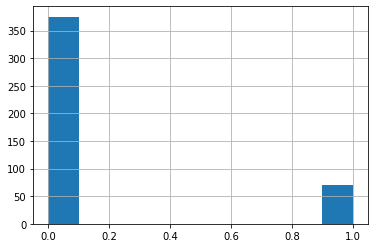

In [16]:
df_training_set.HasHeartDisease.hist()

In [17]:
df_training_set.rename(columns=dict_features, inplace=True)

#### Clean binary values

In [18]:
def get_chest_pains_more_than_30_mins(row):
    if row['ChestPains30'] == 1:
        return 1
    else:
        return 0

In [19]:
df_training_set['ChestPains30'] = df_training_set.apply(lambda row: get_chest_pains_more_than_30_mins(row), axis=1)

In [20]:
df_training_set['ChestPainOrDiscomfort'].value_counts()

1.0    445
Name: ChestPainOrDiscomfort, dtype: int64

It appears all patients that were left in the sample from the selected attributes with no null values, have all experienced chest pain or discomfort. Therefore when training the model, this feature will be dropped as it adds no value.

In [21]:
df_training_set = df_training_set.drop('ChestPainOrDiscomfort', axis=1)

In [22]:
df_training_set

,ChestPains30,TotalCholesterolLevel,TotalLipoproteinALevel,HasIrregularPulse,WaistMeasurement,HasFatigue,HasHeartDisease
1,0,194.0,114.0,1.0,97.0,5.397605e-79,0
5,0,168.0,86.0,1.0,106.9,3.000000e+00,0
6,0,149.0,59.0,1.0,95.5,1.000000e+00,0
25,1,205.0,114.0,2.0,95.0,3.000000e+00,0
37,0,205.0,85.0,1.0,88.9,1.000000e+00,0
...,...,...,...,...,...,...,...
1862,0,226.0,116.0,1.0,119.5,3.000000e+00,0
1866,1,202.0,59.0,1.0,78.6,5.397605e-79,0
1879,1,200.0,86.0,1.0,104.3,2.000000e+00,1
1880,1,196.0,100.0,1.0,116.5,1.000000e+00,0


In [23]:
df_training_set['HasIrregularPulse'].value_counts()

1.0    423
2.0     22
Name: HasIrregularPulse, dtype: int64

In [24]:
def has_irregular_pulse(row):
    if row['HasIrregularPulse'] == 2:
        return 1
    else:
        return 0

In [25]:
df_training_set['HasIrregularPulse'] = df_training_set.apply(lambda row: has_irregular_pulse(row), axis=1)

In [26]:
df_training_set

,ChestPains30,TotalCholesterolLevel,TotalLipoproteinALevel,HasIrregularPulse,WaistMeasurement,HasFatigue,HasHeartDisease
1,0,194.0,114.0,0,97.0,5.397605e-79,0
5,0,168.0,86.0,0,106.9,3.000000e+00,0
6,0,149.0,59.0,0,95.5,1.000000e+00,0
25,1,205.0,114.0,1,95.0,3.000000e+00,0
37,0,205.0,85.0,0,88.9,1.000000e+00,0
...,...,...,...,...,...,...,...
1862,0,226.0,116.0,0,119.5,3.000000e+00,0
1866,1,202.0,59.0,0,78.6,5.397605e-79,0
1879,1,200.0,86.0,0,104.3,2.000000e+00,1
1880,1,196.0,100.0,0,116.5,1.000000e+00,0


In [27]:
df_training_set.corr()['HasHeartDisease'].abs().sort_values(ascending=False)

HasHeartDisease           1.000000
TotalCholesterolLevel     0.232107
ChestPains30              0.221480
TotalLipoproteinALevel    0.149447
WaistMeasurement          0.133483
HasFatigue                0.091340
HasIrregularPulse         0.043827
Name: HasHeartDisease, dtype: float64

Pulse irregularity appears to have lost its correlation with heart disease patients in the remaining sample of patients who answered all questionnaires/performed all medical/physical tests.

In [28]:
df_training_set = df_training_set.drop('HasIrregularPulse', axis=1)

In [29]:
df_training_set

,ChestPains30,TotalCholesterolLevel,TotalLipoproteinALevel,WaistMeasurement,HasFatigue,HasHeartDisease
1,0,194.0,114.0,97.0,5.397605e-79,0
5,0,168.0,86.0,106.9,3.000000e+00,0
6,0,149.0,59.0,95.5,1.000000e+00,0
25,1,205.0,114.0,95.0,3.000000e+00,0
37,0,205.0,85.0,88.9,1.000000e+00,0
...,...,...,...,...,...,...
1862,0,226.0,116.0,119.5,3.000000e+00,0
1866,1,202.0,59.0,78.6,5.397605e-79,0
1879,1,200.0,86.0,104.3,2.000000e+00,1
1880,1,196.0,100.0,116.5,1.000000e+00,0


Label values for Has Fatigue and one hot encode

In [30]:
def get_fatigue_description(row):
    if row['HasFatigue'] == 1:
        return 'FatigueSeveralDays'
    elif row['HasFatigue'] == 2:
        return 'FatigueMoreThanHalfDays'
    elif row['HasFatigue'] == 3:
        return 'FatigueNearlyEveryday'
    else:
        return 'NoFatigue'

In [31]:
df_training_set['HasFatigue'] = df_training_set.apply(lambda row: get_fatigue_description(row), axis=1)

In [32]:
one_hot_has_fatigue = pd.get_dummies(df_training_set['HasFatigue'])
df_training_set = df_training_set.join(one_hot_has_fatigue)
df_training_set = df_training_set.drop('HasFatigue', axis=1)

In [33]:
df_training_set

,ChestPains30,TotalCholesterolLevel,TotalLipoproteinALevel,WaistMeasurement,HasHeartDisease,FatigueMoreThanHalfDays,FatigueNearlyEveryday,FatigueSeveralDays,NoFatigue
1,0,194.0,114.0,97.0,0,0,0,0,1
5,0,168.0,86.0,106.9,0,0,1,0,0
6,0,149.0,59.0,95.5,0,0,0,1,0
25,1,205.0,114.0,95.0,0,0,1,0,0
37,0,205.0,85.0,88.9,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1862,0,226.0,116.0,119.5,0,0,1,0,0
1866,1,202.0,59.0,78.6,0,0,0,0,1
1879,1,200.0,86.0,104.3,1,1,0,0,0
1880,1,196.0,100.0,116.5,0,0,0,1,0


In [39]:
df_training_set.corr()['HasHeartDisease'].abs().sort_values(ascending=False)

HasHeartDisease            1.000000
TotalCholesterolLevel      0.232107
ChestPains30               0.221480
TotalLipoproteinALevel     0.149447
WaistMeasurement           0.133483
FatigueNearlyEveryday      0.100108
FatigueSeveralDays         0.065848
NoFatigue                  0.030900
FatigueMoreThanHalfDays    0.025820
Name: HasHeartDisease, dtype: float64

In [41]:
df_training_set = df_training_set.drop('FatigueSeveralDays', axis=1)
df_training_set = df_training_set.drop('NoFatigue', axis=1)
df_training_set = df_training_set.drop('FatigueMoreThanHalfDays', axis=1)

In [42]:
df_training_set

,ChestPains30,TotalCholesterolLevel,TotalLipoproteinALevel,WaistMeasurement,HasHeartDisease,FatigueNearlyEveryday
1,0,194.0,114.0,97.0,0,0
5,0,168.0,86.0,106.9,0,1
6,0,149.0,59.0,95.5,0,0
25,1,205.0,114.0,95.0,0,1
37,0,205.0,85.0,88.9,0,0
...,...,...,...,...,...,...
1862,0,226.0,116.0,119.5,0,1
1866,1,202.0,59.0,78.6,0,0
1879,1,200.0,86.0,104.3,1,0
1880,1,196.0,100.0,116.5,0,0


### Model Selection

Select top 3 models that perform on dataset.

In [49]:
train_columns = ['ChestPains30', 'TotalCholesterolLevel', 'TotalLipoproteinALevel', 'WaistMeasurement', 'FatigueNearlyEveryday']

In [55]:
x = df_training_set[train_columns]
y = df_training_set['HasHeartDisease']

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, \
    classification_report
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [57]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVR', SVC(gamma='auto')),
          ('GB',GradientBoostingClassifier())]

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.856111 (0.037720)
KNN: 0.820152 (0.036298)
CART: 0.755101 (0.056785)
RF: 0.840404 (0.047659)
SVR: 0.842677 (0.048951)
GB: 0.840354 (0.049548)


### Get Train and Test Sets, and Sample Train Set with Stratified Sampling with Replacement

<AxesSubplot:>

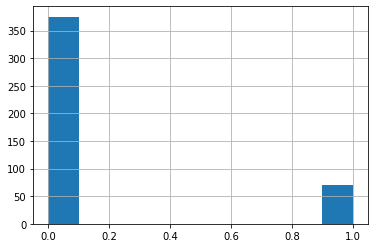

In [58]:
y.hist()

Imbalanced outcome values will cause issues in training, as well as low sample size. Will need to use stratified sampling with replacement.

In [61]:
def stratify_data(df_data, stratify_column_name, stratify_values, stratify_proportions, random_state=None):
    """Stratifies data according to the values and proportions passed in
    Args:
        df_data (DataFrame): source data
        stratify_column_name (str): The name of the single column in the dataframe that holds the data values that will be used to stratify the data
        stratify_values (list of str): A list of all of the potential values for stratifying e.g. "Male, Graduate", "Male, Undergraduate", "Female, Graduate", "Female, Undergraduate"
        stratify_proportions (list of float): A list of numbers representing the desired propotions for stratifying e.g. 0.4, 0.4, 0.2, 0.2, The list values must add up to 1 and must match the number of values in stratify_values
        random_state (int, optional): sets the random_state. Defaults to None.
    Returns:
        DataFrame: a new dataframe based on df_data that has the new proportions represnting the desired strategy for stratifying
    """
    df_stratified = pd.DataFrame(columns = df_data.columns) # Create an empty DataFrame with column names matching df_data

    pos = -1
    for i in range(len(stratify_values)): # iterate over the stratify values (e.g. "Male, Undergraduate" etc.)
        pos += 1
        if pos == len(stratify_values) - 1: 
            ratio_len = len(df_data) - len(df_stratified) # if this is the final iteration make sure we calculate the number of values for the last set such that the return data has the same number of rows as the source data
        else:
            ratio_len = int(len(df_data) * stratify_proportions[i]) # Calculate the number of rows to match the desired proportion

        df_filtered = df_data[df_data[stratify_column_name] ==stratify_values[i]] # Filter the source data based on the currently selected stratify value
        df_temp = df_filtered.sample(replace=True, n=ratio_len, random_state=random_state) # Sample the filtered data using the calculated ratio
        
        df_stratified = pd.concat([df_stratified, df_temp]) # Add the sampled / stratified datasets together to produce the final result
        
    return df_stratified # Return the stratified, re-sampled data 

Get train test set

In [63]:
train, test = train_test_split(df_training_set, test_size=0.3, random_state=0, stratify=y)
train_x = train[train.columns[:-1]]
test_x = test[test.columns[:-1]]
train_y = train['HasHeartDisease'].astype('int')
test_y = test['HasHeartDisease'].astype('int')

Stratify Sample the Train Set to Get more HasHeartDisease samples for training.

In [64]:
stratify_values = [1, 0]
stratify_proportions = [0.5, 0.5]
df_stratified = stratify_data(train, 'HasHeartDisease', stratify_values, stratify_proportions, random_state=42)
df_stratified

,ChestPains30,TotalCholesterolLevel,TotalLipoproteinALevel,WaistMeasurement,HasHeartDisease,FatigueNearlyEveryday
413,0,227.0,120.0,112.1,1,0
548,0,139.0,75.0,115.9,1,1
137,1,178.0,90.0,109.4,1,1
708,1,138.0,69.0,119.1,1,0
672,0,191.0,97.0,85.0,1,0
...,...,...,...,...,...,...
1576,0,179.0,94.0,113.5,0,0
1091,0,204.0,115.0,115.3,0,0
606,1,180.0,72.0,91.1,0,0
1215,0,176.0,89.0,123.4,0,0


<AxesSubplot:>

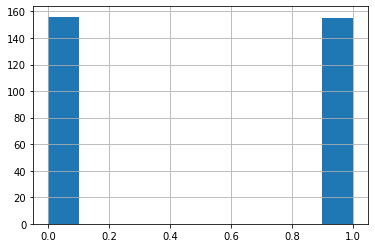

In [65]:
df_stratified.HasHeartDisease.hist()

In [69]:
train_x = train[train_columns]
train_y = train['HasHeartDisease'].astype('int')

#### Train the Model

In [70]:
# random forest
rf_model = RandomForestClassifier()

rf_model.fit(train_x, train_y)

prediction_rf = rf_model.predict(test_x)

metrics.accuracy_score(prediction_rf, test_y)

metrics.confusion_matrix(prediction_rf, test_y)

array([[110,  14],
       [  3,   7]])

ROC Curve

Investigate Patients with False Negatives and False Positives. How could the model be improved to help identify the heart disease patients?